In [1]:
print("Hello world")

Hello world


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# MODEL

## Installing Dependencies

In [2]:
# 🔧 Step 1: Install Dependencies
# ------------------------------
!pip install -q ultralytics tensorflow opencv-python-headless tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 886.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.5 MB/s eta 0:00:00


In [ ]:
# ------------------------------
# 🧠 Step 2: Import Libraries
# ------------------------------
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Download Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajpaswan","key":"db22a7c165902d9e91ed0ffc0a489df2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d manishlearning/40-yoga-poses-dataset

Dataset URL: https://www.kaggle.com/datasets/manishlearning/40-yoga-poses-dataset
License(s): CC0-1.0
 98% 678M/692M [00:07<00:00, 184MB/s]
100% 692M/692M [00:07<00:00, 99.8MB/s]


In [ ]:
!unzip 40-yoga-poses-dataset.zip

Archive:  40-yoga-poses-dataset.zip
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000001.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000002.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000003.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000004.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000005.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000006.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000007.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000008.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000009.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000010.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000011.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000012.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000013.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000014.png  
  inflating: Yoga Dataset_40/Adho Mukha Svanasana/000015.png  
  inflating: Yoga D

## Dataset checking

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
from collections import Counter
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

image_path = 'Yoga Dataset_40'

# Get the list of all subdirectories (classes)
classes = os.listdir(image_path)

# Initialize an empty list to store labels
labels = []

# Loop through each class and get the number of images in each class
for class_name in classes:
    class_dir = os.path.join(image_path, class_name)
    if os.path.isdir(class_dir):  # Ensure it's a directory
        num_images = len(os.listdir(class_dir))  # Count number of images in each class
        labels.extend([class_name] * num_images)  # Append the class label for each image

# Count the number of images per class
label_counts = Counter(labels)

# Convert the label counts into a DataFrame for seaborn

label_counts_df = pd.DataFrame(list(label_counts.items()), columns=['Class', 'Count'])

# Create the seaborn barplot
plt.figure(figsize=(30,20))
sns.barplot(x='Count', y='Class', data=label_counts_df, palette='cool')

# Add title and labels
plt.title('Number of Images per Class', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class', fontsize=12)

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Yoga Dataset_40'

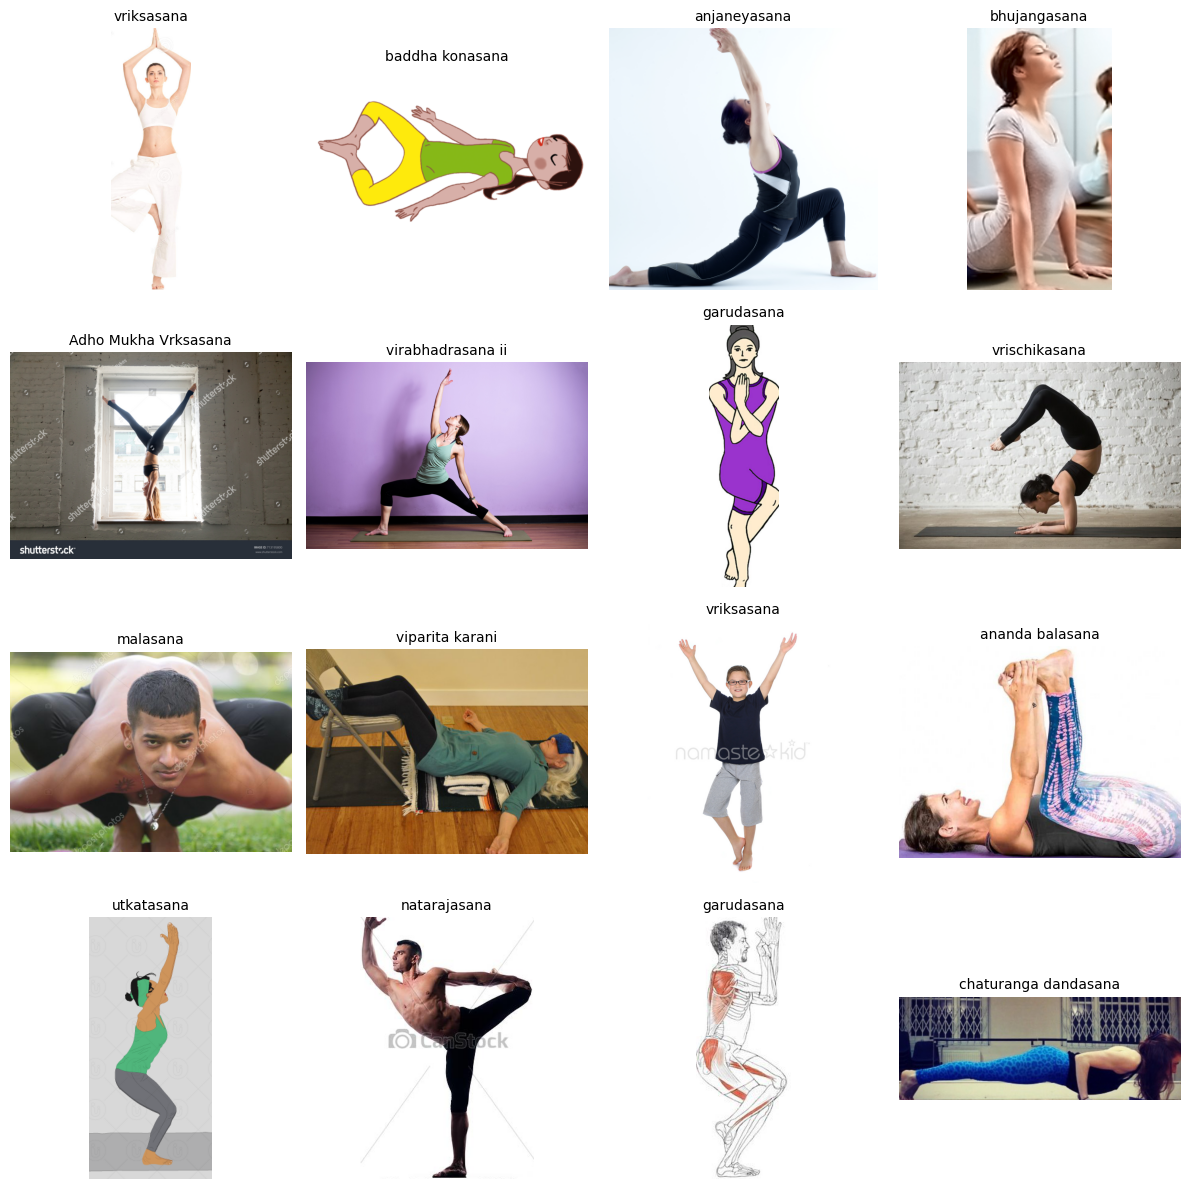

In [ ]:
# Get folder names (class labels)
class_labels = os.listdir(image_path)

# Create a list of (image_path, label) pairs
image_files = []
for label in class_labels:
    class_folder = os.path.join(image_path, label)
    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)
        image_files.extend([(os.path.join(class_folder, img), label) for img in images])

# Shuffle and select 25 images
random.shuffle(image_files)
selected_images = image_files[:25]

# Plot images in a 5x5 grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    img_path, label = selected_images[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    ax.imshow(img)
    ax.set_title(label, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Function to extract keypoints

In [6]:
!pip install tensorflow tensorflow-hub opencv-python-headless pandas scikit-learn mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
grpcio

#### Using MoveNet

In [ ]:
## Loding Movenet and keypoint extraction function

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2  # Changed to OpenCV for better channel handling
import os
import pandas as pd
from tqdm import tqdm

# Load MoveNet Thunder
movenet = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
input_size = 256  # Thunder uses 256x256 input

def detect_keypoints(image_path):
    # Read image with OpenCV (automatically drops alpha channel)
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert BGR to RGB and ensure 3 channels
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to TensorFlow tensor
    img = tf.convert_to_tensor(img, dtype=tf.uint8)

    # Resize with padding and cast to int32
    img = tf.image.resize_with_pad(img, input_size, input_size)
    img = tf.cast(img, dtype=tf.int32)

    # Add batch dimension
    input_image = tf.expand_dims(img, axis=0)

    # Run model inference
    outputs = movenet.signatures['serving_default'](input_image)
    keypoints = outputs['output_0'].numpy()  # (1, 1, 17, 3)

    # Extract x, y coordinates only
    return keypoints[0, 0, :, :2].flatten()  # (34,) array

In [ ]:
# Keypoint Extraction and Saving in CSV file

data_dir = "Yoga Dataset_40"
pose_data = []

for pose_class in os.listdir(data_dir):
    pose_path = os.path.join(data_dir, pose_class)
    if not os.path.isdir(pose_path):
        continue

    for img_name in tqdm(os.listdir(pose_path), desc=f"Processing {pose_class}"):
        try:
            img_path = os.path.join(pose_path, img_name)
            keypoints = detect_keypoints(img_path)
            pose_data.append([pose_class] + keypoints.tolist())
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

# Create dataframe and save
columns = ['label'] + [f'kp_{i}_{c}' for i in range(17) for c in ['x', 'y']]
df = pd.DataFrame(pose_data, columns=columns)
df.to_csv("yoga_keypoints_moveNet.csv", index=False)

Processing virabhadrasana i:  22%|██▏       | 22/101 [00:03<00:13,  5.86it/s]

Error processing 000076.gif: Could not read image: Yoga Dataset_40/virabhadrasana i/000076.gif


Processing bhujangasana: 100%|██████████| 120/120 [00:13<00:00,  9.09it/s]


#### Using Mediapipe

In [ ]:
!pip install mediapipe

In [ ]:
import mediapipe as mp
import cv2
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,       # For single images
    model_complexity=2,           # Highest accuracy
    enable_segmentation=False,
    min_detection_confidence=0.5
)

def detect_keypoints_mediapipe(image_path):
    # Read image with OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process image with MediaPipe
    results = pose.process(img_rgb)

    if not results.pose_landmarks:
        return np.array([])  # Return empty array if no pose detected

    # Extract and denormalize keypoints
    h, w = img.shape[:2]
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        # Denormalize coordinates to image dimensions
        x = landmark.x * w
        y = landmark.y * h
        keypoints.extend([x, y])

    return np.array(keypoints)  # Returns (66,) array (33 landmarks * 2 coordinates)


In [ ]:
# Keypoint Extraction and Saving in CSV file

data_dir = "Yoga Dataset_40"
pose_data = []

for pose_class in os.listdir(data_dir):
    pose_path = os.path.join(data_dir, pose_class)
    if not os.path.isdir(pose_path):
        continue

    for img_name in tqdm(os.listdir(pose_path), desc=f"Processing {pose_class}"):
        try:
            img_path = os.path.join(pose_path, img_name)
            keypoints = detect_keypoints_mediapipe(img_path)
            pose_data.append([pose_class] + keypoints.tolist())
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

# Create dataframe and save
columns = ['label'] + [f'kp_{i}_{c}' for i in range(33) for c in ['x', 'y']]
df = pd.DataFrame(pose_data, columns=columns)
df.to_csv("yoga_keypoints_mediapipe.csv", index=False)

Processing virabhadrasana i:  24%|██▍       | 24/101 [00:03<00:09,  8.24it/s]

Error processing 000076.gif: Could not read image: Yoga Dataset_40/virabhadrasana i/000076.gif


Processing bhujangasana: 100%|██████████| 120/120 [00:16<00:00,  7.19it/s]


# Model Training

In [ ]:
!pip install numpy joblib

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Load the CSV
df = pd.read_csv('yoga_keypoints_moveNet.csv')
print(df.head())
print("Classes:", df['label'].unique())

# Label encode
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label']).values  # shape: (n_samples, 34)
y = df['label'].values  # for sklearn models

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


          label    kp_0_x    kp_0_y    kp_1_x    kp_1_y    kp_2_x    kp_2_y  \
0  anjaneyasana  0.294093  0.389993  0.298191  0.367555  0.305237  0.361209   
1  anjaneyasana  0.325731  0.524249  0.324673  0.534398  0.325019  0.536503   
2  anjaneyasana  0.254989  0.595362  0.247075  0.572117  0.246849  0.569884   
3  anjaneyasana  0.328197  0.380957  0.317883  0.408172  0.316332  0.406291   
4  anjaneyasana  0.298781  0.460380  0.298918  0.483714  0.292360  0.476243   

     kp_3_x    kp_3_y    kp_4_x  ...   kp_12_x   kp_12_y   kp_13_x   kp_13_y  \
0  0.361240  0.357713  0.376848  ...  0.747312  0.595509  0.621769  0.897733   
1  0.334932  0.555747  0.334463  ...  0.538874  0.528577  0.584272  0.369322   
2  0.272575  0.538539  0.275675  ...  0.601759  0.525023  0.706032  0.386571   
3  0.357865  0.445826  0.352810  ...  0.749692  0.371797  0.940836  0.588238   
4  0.348203  0.522016  0.330769  ...  0.653971  0.439285  0.654803  0.200815   

    kp_14_x   kp_14_y   kp_15_x   kp_15_y   

## Different Classifiers

### Random Forest Classifier

In [14]:
  from sklearn.ensemble import RandomForestClassifier

  param_grid_rf = {
      'n_estimators': [100, 200],
      'max_depth': [10, 20, None],
      'min_samples_split': [2, 5]
  }

  grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=1, scoring='accuracy')
  grid_rf.fit(X_train, y_train)

  print("Best RF Params:", grid_rf.best_params_)
  acc = accuracy_score(y_test, grid_rf.predict(X_test))
  print(f"RF Accuracy: {acc*100:.2f}%")



Best RF Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
RF Accuracy: 82.56%


### SVM

In [19]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, n_jobs=1, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
acc = accuracy_score(y_test, grid_svm.predict(X_test))
print(f"SVM Accuracy: {acc*100:.2f}%")


Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 84.14%


### K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=1, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
acc = accuracy_score(y_test, grid_knn.predict(X_test))
print(f"KNN Accuracy: {acc*100:.2f}%")


Best KNN Params: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
KNN Accuracy: 81.17%


### XGBoost

In [21]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=3, n_jobs=1, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
acc = accuracy_score(y_test, grid_xgb.predict(X_test))
print(f"XGB Accuracy: {acc*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:31:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
XGB Accuracy: 81.35%


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, n_jobs=1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
acc = accuracy_score(y_test, grid_lr.predict(X_test))
print(f"RF Accuracy: {acc*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best LR Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
RF Accuracy: 77.55%


In [ ]:
print("Best Model:", max([
    ('RF', accuracy_score(y_test, grid_rf.predict(X_test))),
    ('SVM', accuracy_score(y_test, grid_svm.predict(X_test))),
    ('KNN', accuracy_score(y_test, grid_knn.predict(X_test))),
    ('XGB', accuracy_score(y_test, grid_xgb.predict(X_test))),
    ('LR', accuracy_score(y_test, grid_lr.predict(X_test))),
], key=lambda x: x[1]))


### Performance for Single

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import joblib

print("Accuracy:", accuracy_score(y_test, y_pred))

# Get class probabilities
y_prob = clf.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))

#Saving a model
joblib.dump(clf, 'yoga_pose.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model Saved")

## Train a Neural Network on the Keypoints

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data
df = pd.read_csv("yoga_keypoints_moveNet.csv")
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop(columns=["label"]).values
y = tf.keras.utils.to_categorical(df['label'])  # one-hot encoded

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(34,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2)
model.save("yoga_pose_nn.h5")
model.save('yoga_pose_model.keras')


Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0392 - loss: 3.6794 - val_accuracy: 0.1159 - val_loss: 3.4407
Epoch 2/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0892 - loss: 3.3823 - val_accuracy: 0.1870 - val_loss: 2.9610
Epoch 3/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1549 - loss: 2.9832 - val_accuracy: 0.3449 - val_loss: 2.5793
Epoch 4/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2168 - loss: 2.6551 - val_accuracy: 0.3826 - val_loss: 2.3090
Epoch 5/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2676 - loss: 2.4170 - val_accuracy: 0.4304 - val_loss: 2.1138
Epoch 6/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3265 - loss: 2.2220 - val_accuracy: 0.4986 - val_loss: 1.9242
Epoch 7/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3624 - loss: 2.0954 - val_accuracy: 0.5217 - val_loss: 1.8228
Epoch 8/400
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3901 - loss: 1.9519 - val_accuracy: 0.5957 - val_loss: 1.6

### Evaluation and Plotting

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.6843
Test Accuracy: 85.86% | Loss: 0.7146


NameError: name 'history' is not defined

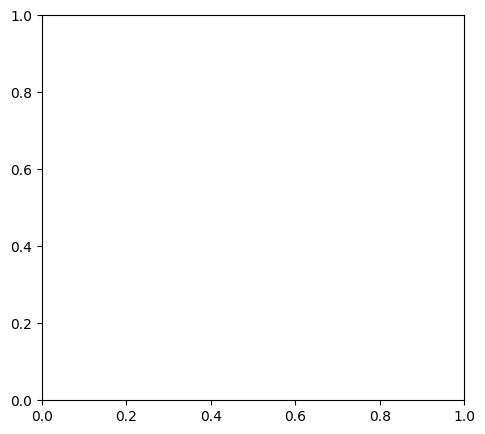

In [ ]:
# Evaluate and plot
results = model.evaluate(X_test, y_test)
loss, acc = results
print(f"Test Accuracy: {acc*100:.2f}% | Loss: {loss:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save model
model.save("yoga_pose_nn.h5")
model.save('yoga_pose_model.keras')

### Better training with Optimization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import joblib
import os

# --- Load and preprocess data ---
df = pd.read_csv("yoga_keypoints_moveNet.csv")  # Shape: [n_samples, 51], 17 keypoints * 3
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(columns=["label"]).values  # shape: (n_samples, 51)
y = tf.keras.utils.to_categorical(df['label'])  # one-hot encoded

# Normalize features (important for NN convergence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler and encoder for deployment
os.makedirs("artifacts", exist_ok=True)
joblib.dump(scaler, "artifacts/keypoint_scaler.pkl")
joblib.dump(label_encoder, "artifacts/label_encoder.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=df['label'], random_state=42
)

# Handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)
class_weights = dict(enumerate(class_weights))

# --- Model definition ---
def build_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(num_classes, activation='softmax')
    ])
    return model


model = build_model(input_dim=X_train.shape[1], num_classes=y_train.shape[1])

# --- Optimizer and Learning Rate Schedule ---
def lr_scheduler(epoch, lr):
    return lr * 0.95 if epoch > 50 else lr

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# --- Callbacks ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=60,
    restore_best_weights=True
)
lr_callback = LearningRateScheduler(lr_scheduler)

# --- Training ---
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[lr_callback],
    class_weight=class_weights,
    verbose=2
)

# --- Evaluation ---
y_pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=label_encoder.classes_))

# --- Save Model ---
model.save("artifacts/yoga_pose_model.h5")
model.save("artifacts/yoga_pose_model.keras")

print("✅ Model, scaler, and label encoder saved in /artifacts folder.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
87/87 - 6s - 71ms/step - accuracy: 0.1736 - loss: 3.6006 - precision_1: 0.4063 - recall_1: 0.0464 - val_accuracy: 0.4783 - val_loss: 2.8729 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 1.0000e-03
Epoch 2/300
87/87 - 0s - 5ms/step - accuracy: 0.3603 - loss: 2.4561 - precision_1: 0.6050 - recall_1: 0.1410 - val_accuracy: 0.6159 - val_loss: 2.1828 - val_precision_1: 1.0000 - val_recall_1: 0.0420 - learning_rate: 1.0000e-03
Epoch 3/300
87/87 - 1s - 6ms/step - accuracy: 0.4922 - loss: 2.0289 - precision_1: 0.7314 - recall_1: 0.2497 - val_accuracy: 0.7043 - val_loss: 1.6488 - val_precision_1: 0.9486 - val_recall_1: 0.2406 - learning_rate: 1.0000e-03
Epoch 4/300
87/87 - 1s - 6ms/step - accuracy: 0.5672 - loss: 1.7687 - precision_1: 0.7697 - recall_1: 0.3393 - val_accuracy: 0.7391 - val_loss: 1.3450 - val_precision_1: 0.9398 - val_recall_1: 0.4522 - learning_rate: 1.0000e-03
Epoch 5/300
87/87 - 1s - 9ms/step - accuracy: 0.6028 - loss: 1.6045 - precision

                        precision    recall  f1-score   support

  Adho Mukha Svanasana       1.00      1.00      1.00        21
  Adho Mukha Vrksasana       0.85      0.81      0.83        21
       ananda balasana       0.95      0.95      0.95        19
          anjaneyasana       0.79      0.90      0.84        21
     ardha chandrasana       1.00      0.90      0.95        21
  ardha matsyendrasana       0.91      0.95      0.93        22
      ardha uttanasana       0.84      0.76      0.80        21
         astavakrasana       0.92      0.96      0.94        23
       baddha konasana       1.00      0.75      0.86        20
              bakasana       0.95      0.86      0.90        21
              balasana       0.91      0.95      0.93        21
             bhekasana       0.95      1.00      0.98        21
          bhujangasana       0.75      0.50      0.60        24
         bhujapidasana       0.81      0.81      0.81        21
            bitilasana       0.95      

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.4971 - precision_1: 0.9136 - recall_1: 0.8873
Test Accuracy: 88.99% | Loss: 0.5664 | Precision: 0.91 | Recall: 0.88


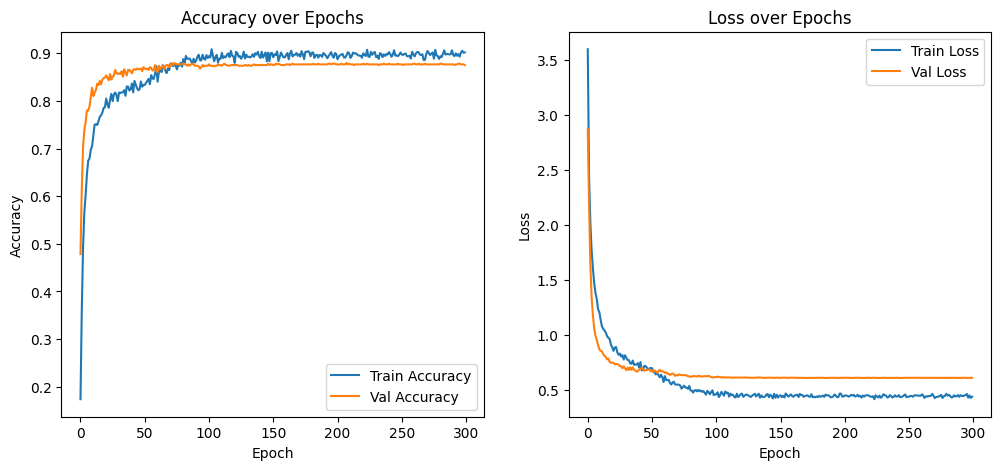

In [ ]:
import matplotlib.pyplot as plt

results = model.evaluate(X_test, y_test)
loss, acc, precision, recall = results
print(f"Test Accuracy: {acc*100:.2f}% | Loss: {loss:.4f} | Precision: {precision:.2f} | Recall: {recall:.2f}")


# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.tight_layout()
plt.show()




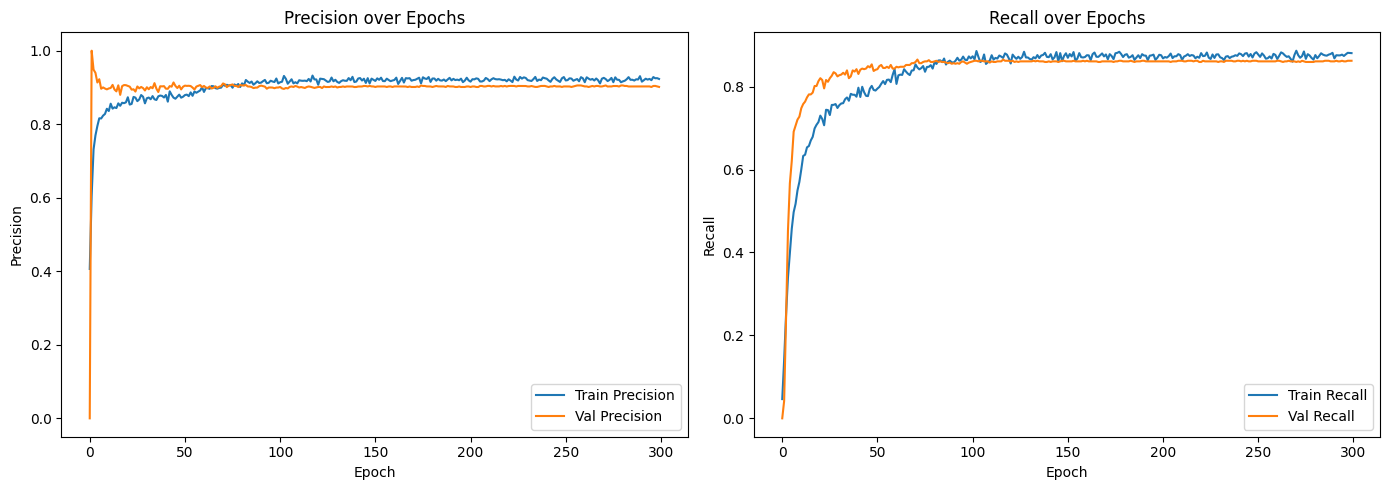

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))  # Wider figure

# Plot Precision
plt.subplot(1, 2, 1)
plt.plot(history.history['precision_1'], label='Train Precision')
plt.plot(history.history['val_precision_1'], label='Val Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()


# Plot Recall
plt.subplot(1, 2, 2)
plt.plot(history.history['recall_1'], label='Train Recall')
plt.plot(history.history['val_recall_1'], label='Val Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()


plt.tight_layout()  # Adjust layout
plt.show()


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


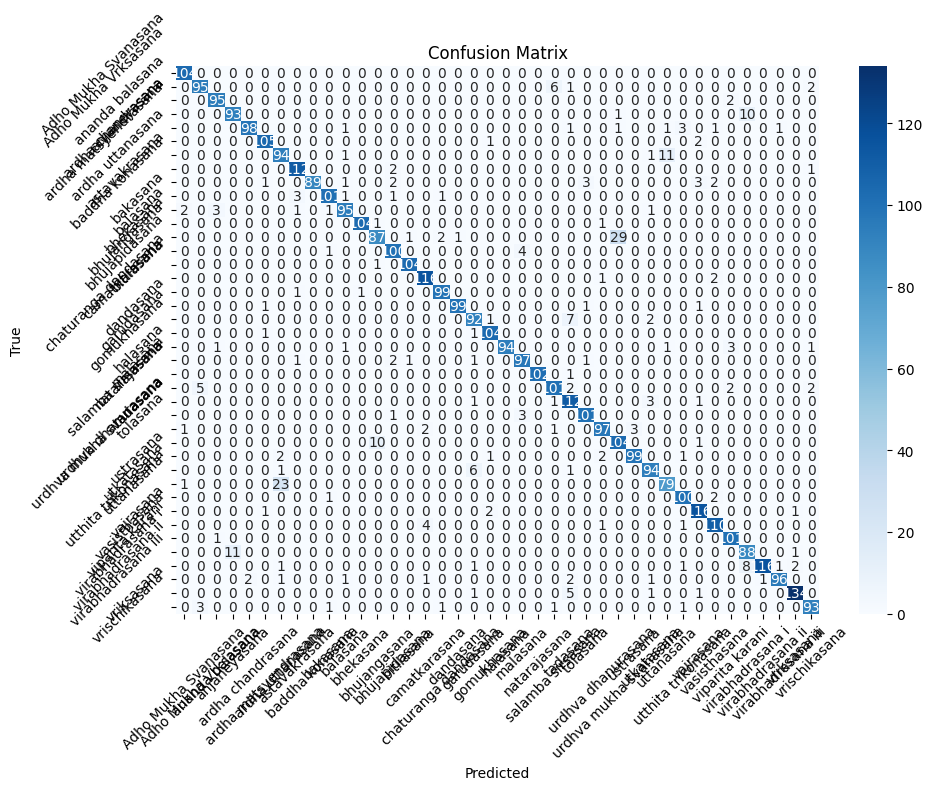

                        precision    recall  f1-score   support

  Adho Mukha Svanasana       0.96      1.00      0.98       104
  Adho Mukha Vrksasana       0.92      0.91      0.92       104
       ananda balasana       0.95      0.98      0.96        97
          anjaneyasana       0.89      0.89      0.89       104
     ardha chandrasana       0.98      0.92      0.95       107
  ardha matsyendrasana       0.96      0.97      0.97       108
      ardha uttanasana       0.77      0.88      0.82       107
         astavakrasana       0.95      0.97      0.96       115
       baddha konasana       1.00      0.88      0.94       101
              bakasana       0.96      0.94      0.95       107
              balasana       0.94      0.92      0.93       103
             bhekasana       0.99      0.98      0.99       106
          bhujangasana       0.88      0.72      0.79       120
         bhujapidasana       0.93      0.95      0.94       105
            bitilasana       0.98      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# --- Load model and data ---
model = load_model("yoga_pose_moveNet_model.h5")
df = pd.read_csv("yoga_keypoints_moveNet.csv")

# --- Encode labels ---
label_encoder = LabelEncoder()
y_true_labels = label_encoder.fit_transform(df['label'])
X = df.drop(columns=["label"]).values

# --- Re-apply standard scaling (no scaler file used) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Predict ---
y_pred = model.predict(X_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Optional: Detailed Metrics ---
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))


## Autotune Keras Model for best hyperparameter

In [ ]:
!pip install -q keras-tuner

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras_tuner as kt

# 👉 Assume X and y are already defined and preprocessed
# For example:
# - X: shape (num_samples, num_features)
# - y: one-hot or categorical labels

# STEP 1: Convert one-hot labels (if needed) to integer labels
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# STEP 2: Ensure y is integer-encoded
y = np.array(y).astype(np.int32)

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 4: Get number of classes
num_classes = len(np.unique(y_train))

# STEP 5: Define model builder for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=64, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=tf.keras.regularizers.l2(0.001)
        ))
        model.add(tf.keras.layers.Dropout(
            rate=hp.Float(f"dropout_{i}", min_value=0.1, max_value=0.5, step=0.1)
        ))

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("lr", 1e-4, 1e-2, sampling="log")
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# STEP 6: Setup tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_dir',
    project_name='pose_tuning'
)

# STEP 7: Run the search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# STEP 8: Get best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


## Download Models

In [ ]:
from google.colab import files

files.download("yoga_pose_nn.h5")
files.download("label_encoder.pkl")
